In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,ID,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,...,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job,income
0,0,2004,0,2,High school,White,United-States,Associates degree-academic program,Householder,Business and repair services,...,No,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,More than 50K $
1,1,2005,0,0,College/University,White,Japan,Children,Child <18 never marr not in subfamily,Not in universe or children,...,No,0,Both_Pr,0.0,NaN,NB_US,NaN,Nonfiler,Children/Armed_Forces,More than 50K $
2,2,2004,0,2,NaN,White,United-States,Some college but no degree,Secondary individual,Manufacturing-durable goods,...,Yes,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces,More than 50K $
3,3,2004,0,2,College/University,Amer/Indian/Aleut/Eskimo,United-States,High school graduate,Householder,Wholesale trade,...,NaN,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,More than 50K $
4,4,2004,0,2,NaN,White,United-States,High school graduate,Householder,Wholesale trade,...,NaN,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces,More than 50K $


In [4]:
df.shape

(105000, 34)

In [5]:
df['ID'].unique

<bound method Series.unique of 0              0
1              1
2              2
3              3
4              4
           ...  
104995    104995
104996    104996
104997    104997
104998    104998
104999    104999
Name: ID, Length: 105000, dtype: int64>

In [6]:
# the id column is not a significant column

In [7]:
df.describe

<bound method NDFrame.describe of             ID  year_of_poll  own_self_emp  veteran benefits  \
0            0          2004             0                 2   
1            1          2005             0                 0   
2            2          2004             0                 2   
3            3          2004             0                 2   
4            4          2004             0                 2   
...        ...           ...           ...               ...   
104995  104995          2005             2                 2   
104996  104996          2004             0                 0   
104997  104997          2004             0                 2   
104998  104998          2005             0                 2   
104999  104999          2005             0                 0   

        currently_enrolled                      race  father_country  \
0              High school                     White   United-States   
1       College/University                     White 

In [8]:
df.columns

Index(['ID', 'year_of_poll', 'own_self_emp', 'veteran benefits',
       'currently_enrolled', 'race', 'father_country', 'educ', 'house_stat',
       'major_ind_code', 'labour_union', 'self_country', 'major_occ_code',
       'age', 'mother_country', 'house_summary', 'gender', 'hisp_origin',
       'gains', 'dividends', 'marriage_status', 'losses', 'employer_of',
       'house_1yr_ago', 'income_filled', 'weeks_worked', 'under18',
       'hourly_wage', 'unemp_reason', 'citizenship', 'woker_type',
       'fed_liability', 'full_partime_job', 'income'],
      dtype='object')

In [9]:
df['year_of_poll'].value_counts()

2005    52532
2004    52468
Name: year_of_poll, dtype: int64

In [10]:
df['own_self_emp'].value_counts()

0    95004
2     8568
1     1428
Name: own_self_emp, dtype: int64

In [11]:
(df.isnull().sum()/len(df))*100

ID                     0.000000
year_of_poll           0.000000
own_self_emp           0.000000
veteran benefits       0.000000
currently_enrolled    29.945714
race                   0.000000
father_country         0.000000
educ                   0.000000
house_stat             0.010476
major_ind_code         0.000000
labour_union          33.648571
self_country           0.000000
major_occ_code        50.528571
age                    0.000000
mother_country         0.000000
house_summary          0.000000
gender                 0.000000
hisp_origin            0.000000
gains                  0.000000
dividends              0.000000
marriage_status        0.000000
losses                 0.000000
employer_of            0.000000
house_1yr_ago         50.782857
income_filled         30.860000
weeks_worked           0.000000
under18               72.396190
hourly_wage            0.000000
unemp_reason          96.962857
citizenship            0.000000
woker_type            50.319048
fed_liab

In [12]:
# unemp_reason,house_1yr_ago,under18,woker_type,major_occ_code has high percentage of data 

In [13]:
df.drop(['unemp_reason','house_1yr_ago','under18','woker_type','major_occ_code','ID'],axis=1,inplace=True)

In [14]:
df.shape


(105000, 28)

In [15]:
df['currently_enrolled'].value_counts()

College/University    42386
 High school          31171
Name: currently_enrolled, dtype: int64

In [16]:
df['currently_enrolled'].mode()

0    College/University
Name: currently_enrolled, dtype: object

In [17]:
df['currently_enrolled'].fillna('College/University',inplace=True)

In [18]:
df['labour_union'].value_counts()

no     59270
yes    10399
Name: labour_union, dtype: int64

In [19]:
df['labour_union'].fillna('no',inplace=True)

In [20]:
df['income_filled'].describe()

count     72597
unique        2
top          No
freq      56142
Name: income_filled, dtype: object

In [21]:
df['income_filled'].value_counts()

 No     56142
 Yes    16455
Name: income_filled, dtype: int64

In [22]:
df['income_filled'].fillna('yes',inplace=True)

In [23]:
df['full_partime_job'].describe()

count                    103608
unique                        8
top       Children/Armed_Forces
freq                      64168
Name: full_partime_job, dtype: object

In [24]:
df['full_partime_job'].value_counts()

Children/Armed_Forces                  64168
 Full-time schedules                   21083
 Not in labor force                    14051
 PT for non-econ reasons usually FT     1737
 Unemployed full-time                   1185
 PT for econ reasons usually PT          654
 Unemployed part- time                   450
 PT for econ reasons usually FT          280
Name: full_partime_job, dtype: int64

In [25]:
df['full_partime_job'].mode()

0    Children/Armed_Forces
Name: full_partime_job, dtype: object

In [26]:
df['full_partime_job'].fillna('Children/Armed_Forces',inplace=True)

In [27]:
df['house_stat'].value_counts()

 Householder                                        28081
 Child <18 never marr not in subfamily              26380
 Spouse of householder                              21940
 Nonfamily householder                              11728
 Child 18+ never marr Not in a subfamily             6320
 Secondary individual                                3224
 Other Rel 18+ ever marr not in subfamily             997
 Grandchild <18 never marr child of subfamily RP      980
 Other Rel 18+ never marr not in subfamily            929
 Child 18+ ever marr Not in a subfamily               547
 Grandchild <18 never marr not in subfamily           542
 Child under 18 of RP of unrel subfamily              390
 RP of unrelated subfamily                            388
 Other Rel 18+ ever marr RP of subfamily              386
 Child 18+ ever marr RP of subfamily                  350
 Other Rel <18 never marr child of subfamily RP       348
 Other Rel <18 never marr not in subfamily            316
 Other Rel 18+

In [28]:
df['house_stat'].mode()

0     Householder
Name: house_stat, dtype: object

In [29]:
df['house_stat'].fillna('Householder',inplace=True)

In [30]:
df.isnull().sum()

year_of_poll          0
own_self_emp          0
veteran benefits      0
currently_enrolled    0
race                  0
father_country        0
educ                  0
house_stat            0
major_ind_code        0
labour_union          0
self_country          0
age                   0
mother_country        0
house_summary         0
gender                0
hisp_origin           0
gains                 0
dividends             0
marriage_status       0
losses                0
employer_of           0
income_filled         0
weeks_worked          0
hourly_wage           0
citizenship           0
fed_liability         0
full_partime_job      0
income                0
dtype: int64

<AxesSubplot:>

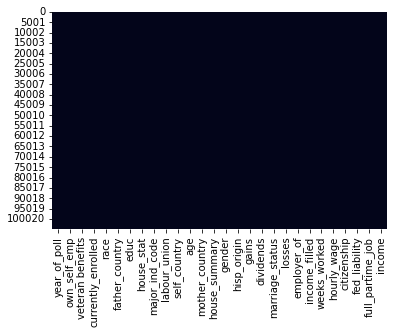

In [31]:
sns.heatmap(df.isnull(),cbar=False)
# we couldn't find the missing value from the dataset.

In [32]:
df_n = df.select_dtypes(include=[np.number])
df_c = df.select_dtypes(exclude=[np.number])

In [33]:
df_n.head()

,year_of_poll,own_self_emp,veteran benefits,age,gains,dividends,losses,employer_of,weeks_worked,hourly_wage
0,2004,0,2,42,0.0,0.0,0.0,1,47,0.0
1,2005,0,0,10,0.0,0.0,0.0,0,0,0.0
2,2004,0,2,46,0.0,0.0,0.0,6,47,0.0
3,2004,0,2,35,0.0,0.0,0.0,2,47,0.0
4,2004,0,2,61,0.0,0.0,0.0,3,47,0.0


In [34]:
df_c.head(2)

,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,labour_union,self_country,mother_country,house_summary,gender,hisp_origin,marriage_status,income_filled,citizenship,fed_liability,full_partime_job,income
0,High school,White,United-States,Associates degree-academic program,Householder,Business and repair services,no,United-States,United-States,Householder,M,All_Other,Married_civilian_Sp_Pr,No,NB_US,Joint_both_under65,Children/Armed_Forces,More than 50K $
1,College/University,White,Japan,Children,Child <18 never marr not in subfamily,Not in universe or children,no,United-States,United-States,Child_U18_Unmarried,M,Mex_Amer,Unmarried,No,NB_US,Nonfiler,Children/Armed_Forces,More than 50K $


In [35]:
# 'currentl_enrolled' is of ordered column so, it is ordinal encoding is used
# 'race' , here we can use n-1 dummy encoding
# 'father_country', here the number of countries may be higher so we can use frequency encoding
# 'educ' has higher number of unique values so here we can use frequency encoding
# 'house_stat' has higher number of unique values so here we can use frequency encoding
# 'major_ind_code' has higher number of unique values so here we can use frequency encoding
# 'labour_union', here we can use n-1 dummy encoding
# 'self_country' has higher number of unique values so here we can use frequency encoding
# 'mother_country' has higher number of unique values so here we can use frequency encoding
# 'house_summary' here we can use n-1 dummy encoding
# 'gendr' here we can use n-1 dummy encoding
# 'hisp_origin' here we can use n-1 dummy encoding
# 'marriage_status' here we can use n-1 dummy encoding
# 'income_filled' here we can use n-1 dummy encoding
# 'citizenship' here we can use n-1 dummy encoding
# 'fed_liability' here we can use n-1 dummy encoding
# 'full_partime_job' here we can use frequency encoding
# 'income' this is the target column we can replace it by 0,1


In [36]:
df_c=pd.get_dummies(df_c,columns=['race','labour_union','house_summary',
                             'gender','hisp_origin','marriage_status','income_filled','citizenship',
                             'fed_liability'],drop_first=True)

In [37]:
df_c.shape

(105000, 48)

In [38]:
df_c.head(2)

,currently_enrolled,father_country,educ,house_stat,major_ind_code,self_country,mother_country,full_partime_job,income,race_ Other,...,income_filled_yes,citizenship_FB_US,citizenship_NB_PR,citizenship_NB_US,citizenship_NB_US_Parents,fed_liability_ Nonfiler,fed_liability_ Single,fed_liability_Joint_both_Above65,fed_liability_Joint_both_under65,fed_liability_Joint_one_Under65_one_Above65
0,High school,United-States,Associates degree-academic program,Householder,Business and repair services,United-States,United-States,Children/Armed_Forces,More than 50K $,0,...,0,0,0,1,0,0,0,0,1,0
1,College/University,Japan,Children,Child <18 never marr not in subfamily,Not in universe or children,United-States,United-States,Children/Armed_Forces,More than 50K $,0,...,0,0,0,1,0,1,0,0,0,0


In [39]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df_c[['currently_enrolled']] = enc.fit_transform(df_c[['currently_enrolled']])

In [40]:
father_country = (df_c.groupby('father_country').size()) / len(df)
df_c['father_country']=df_c['father_country'].map(father_country)

# another method
#enc_nom_1 = (train.groupby('nom_1').size()) / len(train)
#train['nom_1_encode'] = train['nom_1'].apply(lambda x : enc_nom_1[x])

In [41]:
educ = (df_c.groupby('educ').size()) / len(df)
df_c['educ']=df_c['educ'].map(educ)

In [42]:
house_stat = (df_c.groupby('house_stat').size()) / len(df)
df_c['house_stat']=df_c['house_stat'].map(house_stat)

In [43]:
major_ind_code = (df_c.groupby('major_ind_code').size()) / len(df)
df_c['major_ind_code']=df_c['major_ind_code'].map(major_ind_code)

In [44]:
self_country = (df_c.groupby('self_country').size()) / len(df)
df_c['self_country']=df_c['self_country'].map(self_country)

In [45]:
mother_country = (df_c.groupby('mother_country').size()) / len(df)
df_c['mother_country']=df_c['mother_country'].map(mother_country)

In [46]:
full_partime_job = (df_c.groupby('full_partime_job').size()) / len(df)
df_c['full_partime_job']=df_c['full_partime_job'].map(full_partime_job)

In [47]:
df_y = df[['income']]

In [50]:
df_y.replace(to_replace=['More than 50K $', 'Less than 50K $'],value=(1,0),inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_22384\2065964613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y.replace(to_replace=['More than 50K $', 'Less than 50K $'],value=(1,0),inplace=True)


In [51]:
df_y.head(2)

,income
0,1
1,1


In [52]:
df_c.drop(['income'],axis=1,inplace=True)

In [53]:
df_c.head()

,currently_enrolled,father_country,educ,house_stat,major_ind_code,self_country,mother_country,full_partime_job,race_ Other,race_ White,...,income_filled_yes,citizenship_FB_US,citizenship_NB_PR,citizenship_NB_US,citizenship_NB_US_Parents,fed_liability_ Nonfiler,fed_liability_ Single,fed_liability_Joint_both_Above65,fed_liability_Joint_both_under65,fed_liability_Joint_one_Under65_one_Above65
0,0.0,0.797333,0.021800,0.267438,0.028210,0.885924,0.803086,0.624381,0,1,...,0,0,0,1,0,0,0,0,1,0
1,1.0,0.001990,0.236486,0.251238,0.505286,0.885924,0.803086,0.624381,0,1,...,0,0,0,1,0,1,0,0,0,0
2,1.0,0.797333,0.139400,0.030705,0.045762,0.885924,0.803086,0.624381,0,1,...,0,0,0,1,0,0,1,0,0,0
3,1.0,0.797333,0.243886,0.267438,0.017695,0.885924,0.803086,0.624381,0,0,...,1,0,0,1,0,0,0,0,1,0
4,1.0,0.797333,0.243886,0.267438,0.017695,0.885924,0.803086,0.624381,0,1,...,1,0,0,1,0,0,1,0,0,0


In [54]:
df_n.head()

,year_of_poll,own_self_emp,veteran benefits,age,gains,dividends,losses,employer_of,weeks_worked,hourly_wage
0,2004,0,2,42,0.0,0.0,0.0,1,47,0.0
1,2005,0,0,10,0.0,0.0,0.0,0,0,0.0
2,2004,0,2,46,0.0,0.0,0.0,6,47,0.0
3,2004,0,2,35,0.0,0.0,0.0,2,47,0.0
4,2004,0,2,61,0.0,0.0,0.0,3,47,0.0


In [77]:
# own_self_emp is catogorical variable 
# veteran benefits is also a catagorical variable
# employer_of is also a catagorical variable
# year of poll is also a catagorical variable

In [79]:
df_c=df_c+df_n[['year_of_poll','own_self_emp','veteran benefits','employer_of']]

In [81]:
df_n.drop(columns=['year_of_poll','own_self_emp','veteran benefits','employer_of'],inplace=True)

In [82]:
df_n.head(2)

,age,gains,dividends,losses,weeks_worked,hourly_wage
0,42,0.0,0.0,0.0,47,0.0
1,10,0.0,0.0,0.0,0,0.0


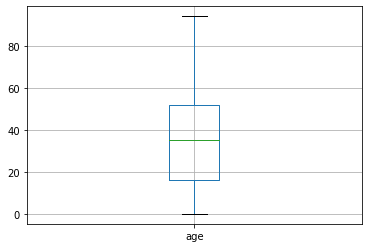

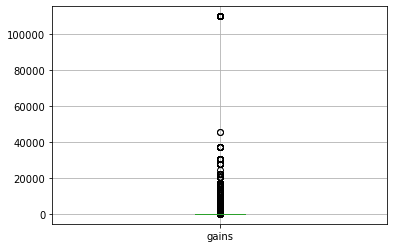

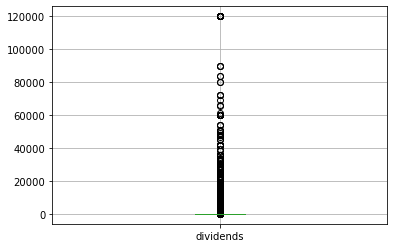

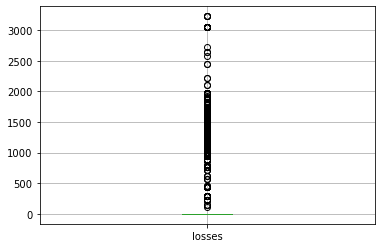

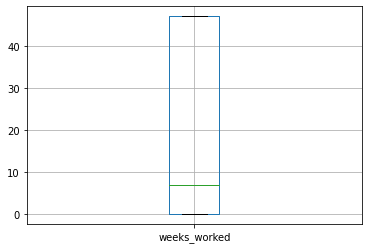

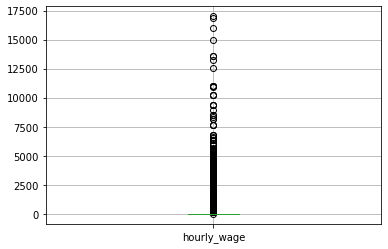

In [89]:
import matplotlib.pyplot as plt

for column in df_n:
    plt.figure()
    df_n.boxplot([column])

In [ ]:
sns.heatmap(df.corr(),annot=True,cbar=False)